# INFO 3401 – Class 06: Combining data

[Brian C. Keegan, Ph.D.](http://brianckeegan.com/)  
[Assistant Professor, Department of Information Science](https://www.colorado.edu/cmci/people/information-science/brian-c-keegan)  
University of Colorado Boulder  

Copyright and distributed under an [MIT License](https://opensource.org/licenses/MIT).

## Learning Objectives
This may review content you have learned in other classes, but we want to start with the same foundation since pandas is so fundamental to everything else we will do in this class!

* Try out a new model of pre-class lecture where I code-as-I-go
* Use `concat` to combine multiple DataFrames together
* Strategies for visualizing larger datasets

## Load libraries

In [2]:
import pandas as pd
import numpy as np

pd.options.display.max_columns = 100

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sb

import os

## Working with multiple DataFrames

Let's work with both the CDC weekly death count data for [2019-20](https://data.cdc.gov/NCHS/Weekly-Counts-of-Deaths-by-State-and-Select-Causes/muzy-jte6) as well as [2014-18](https://data.cdc.gov/NCHS/Weekly-counts-of-deaths-by-jurisdiction-and-age-gr/y5bj-9g5w) as well as a new dataset, the Social Security Administration's [Baby Names](https://www.ssa.gov/OACT/babynames/limits.html) dataset. I've posted both of these on Canvas, as well.

In [4]:
cdc_1920_df = pd.read_csv('Weekly_Counts_of_Deaths_by_State_and_Select_Causes__2019-2020.csv')

cdc_1920_df.head()

,Jurisdiction of Occurrence,MMWR Year,MMWR Week,Week Ending Date,All Cause,Natural Cause,Septicemia (A40-A41),Malignant neoplasms (C00-C97),Diabetes mellitus (E10-E14),Alzheimer disease (G30),Influenza and pneumonia (J09-J18),Chronic lower respiratory diseases (J40-J47),"Other diseases of respiratory system (J00-J06,J30-J39,J67,J70-J98)","Nephritis, nephrotic syndrome and nephrosis (N00-N07,N17-N19,N25-N27)","Symptoms, signs and abnormal clinical and laboratory findings, not elsewhere classified (R00-R99)","Diseases of heart (I00-I09,I11,I13,I20-I51)",Cerebrovascular diseases (I60-I69),"COVID-19 (U071, Multiple Cause of Death)","COVID-19 (U071, Underlying Cause of Death)",flag_allcause,flag_natcause,flag_sept,flag_neopl,flag_diab,flag_alz,flag_inflpn,flag_clrd,flag_otherresp,flag_nephr,flag_otherunk,flag_hd,flag_stroke,flag_cov19mcod,flag_cov19ucod
0,Alabama,2019,1,1/5/2019,1077.0,993.0,30.0,198.0,22.0,60.0,21.0,63.0,14.0,21.0,27.0,261.0,53.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Alabama,2019,2,1/12/2019,1090.0,994.0,25.0,187.0,24.0,49.0,18.0,85.0,21.0,13.0,11.0,275.0,65.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Alabama,2019,3,1/19/2019,1114.0,1042.0,22.0,238.0,18.0,48.0,31.0,80.0,30.0,25.0,15.0,283.0,53.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Alabama,2019,4,1/26/2019,1063.0,994.0,21.0,165.0,22.0,50.0,22.0,113.0,14.0,25.0,23.0,279.0,56.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Alabama,2019,5,2/2/2019,1095.0,1026.0,18.0,199.0,19.0,52.0,19.0,80.0,20.0,24.0,21.0,290.0,50.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
cdc_1418_df = pd.read_csv('Weekly_Counts_of_Deaths_by_State_and_Select_Causes__2014-2018.csv')

cdc_1418_df.head()

,Jurisdiction of Occurrence,MMWR Year,MMWR Week,Week Ending Date,All Cause,Natural Cause,Septicemia (A40-A41),Malignant neoplasms (C00-C97),Diabetes mellitus (E10-E14),Alzheimer disease (G30),Influenza and pneumonia (J10-J18),Chronic lower respiratory diseases (J40-J47),"Other diseases of respiratory system (J00-J06,J30-J39,J67,J70-J98)","Nephritis, nephrotic syndrome and nephrosis (N00-N07,N17-N19,N25-N27)","Symptoms, signs and abnormal clinical and laboratory findings, not elsewhere classified (R00-R99)","Diseases of heart (I00-I09,I11,I13,I20-I51)",Cerebrovascular diseases (I60-I69),flag_allcause,flag_natcause,flag_sept,flag_neopl,flag_diab,flag_alz,flag_inflpn,flag_clrd,flag_otherresp,flag_nephr,flag_otherunk,flag_hd,flag_stroke
0,Alabama,2014,1,01/04/2014,355,327,NaN,60.0,NaN,10.0,NaN,20.0,NaN,NaN,12.0,87.0,18.0,NaN,NaN,Suppressed (counts 1-9),NaN,Suppressed (counts 1-9),NaN,Suppressed (counts 1-9),NaN,Suppressed (counts 1-9),Suppressed (counts 1-9),NaN,NaN,NaN
1,Alabama,2014,2,01/11/2014,872,792,23.0,163.0,23.0,35.0,32.0,61.0,14.0,22.0,25.0,199.0,40.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Alabama,2014,3,01/18/2014,1044,971,21.0,209.0,34.0,31.0,33.0,77.0,19.0,24.0,19.0,242.0,60.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Alabama,2014,4,01/25/2014,1022,967,25.0,205.0,23.0,25.0,42.0,74.0,16.0,22.0,35.0,249.0,53.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Alabama,2014,5,02/01/2014,1040,953,18.0,200.0,26.0,38.0,26.0,68.0,15.0,18.0,24.0,269.0,50.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Are these identical columns?

In [16]:
set(cdc_1418_df.columns) - set(cdc_1920_df.columns)

set()

In [17]:
set(cdc_1920_df.columns) - set(cdc_1418_df.columns)

{'COVID-19 (U071, Multiple Cause of Death)',
 'COVID-19 (U071, Underlying Cause of Death)',
 'flag_cov19mcod',
 'flag_cov19ucod'}

In [14]:
cdc_1418_df.rename(columns={'All  Cause':'All Cause',
                            'Influenza and pneumonia (J10-J18)':'Influenza and pneumonia',
                           },inplace=True)

In [15]:
cdc_1920_df.rename(columns={'Influenza and pneumonia (J09-J18)':'Influenza and pneumonia',
                           },inplace=True)

## Combining DataFrames with `concat`

In [22]:
cdc_big_df = pd.concat(objs=[cdc_1418_df,cdc_1920_df],
                       axis=0,
                       ignore_index=True,
                       sort=False,
                       join='outer'
                      )

cdc_big_df.head()

,Jurisdiction of Occurrence,MMWR Year,MMWR Week,Week Ending Date,All Cause,Natural Cause,Septicemia (A40-A41),Malignant neoplasms (C00-C97),Diabetes mellitus (E10-E14),Alzheimer disease (G30),Influenza and pneumonia,Chronic lower respiratory diseases (J40-J47),"Other diseases of respiratory system (J00-J06,J30-J39,J67,J70-J98)","Nephritis, nephrotic syndrome and nephrosis (N00-N07,N17-N19,N25-N27)","Symptoms, signs and abnormal clinical and laboratory findings, not elsewhere classified (R00-R99)","Diseases of heart (I00-I09,I11,I13,I20-I51)",Cerebrovascular diseases (I60-I69),flag_allcause,flag_natcause,flag_sept,flag_neopl,flag_diab,flag_alz,flag_inflpn,flag_clrd,flag_otherresp,flag_nephr,flag_otherunk,flag_hd,flag_stroke,"COVID-19 (U071, Multiple Cause of Death)","COVID-19 (U071, Underlying Cause of Death)",flag_cov19mcod,flag_cov19ucod
0,Alabama,2014,1,01/04/2014,355.0,327.0,NaN,60.0,NaN,10.0,NaN,20.0,NaN,NaN,12.0,87.0,18.0,NaN,NaN,Suppressed (counts 1-9),NaN,Suppressed (counts 1-9),NaN,Suppressed (counts 1-9),NaN,Suppressed (counts 1-9),Suppressed (counts 1-9),NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Alabama,2014,2,01/11/2014,872.0,792.0,23.0,163.0,23.0,35.0,32.0,61.0,14.0,22.0,25.0,199.0,40.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Alabama,2014,3,01/18/2014,1044.0,971.0,21.0,209.0,34.0,31.0,33.0,77.0,19.0,24.0,19.0,242.0,60.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Alabama,2014,4,01/25/2014,1022.0,967.0,25.0,205.0,23.0,25.0,42.0,74.0,16.0,22.0,35.0,249.0,53.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Alabama,2014,5,02/01/2014,1040.0,953.0,18.0,200.0,26.0,38.0,26.0,68.0,15.0,18.0,24.0,269.0,50.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
disease_renamed_cols = {col:col.split(' (')[0] for col in cdc_big_df.columns if ' (' in col}

In [38]:
flag_cols = [col for col in cdc_big_df.columns if 'flag_' in col]

In [40]:
# Rename
cdc_big_df.rename(columns=disease_renamed_cols,inplace=True)

In [43]:
# Drop flag cols
cdc_big_df.drop(columns=flag_cols,inplace=True)

In [ ]:
# Remove the NYC and United States data
boolean_us = cdc_big_df['Jurisdiction of Occurrence'] == 'United States'
boolean_nyc = cdc_big_df['Jurisdiction of Occurrence'] == 'New York City'

cdc_big_df = cdc_big_df[~boolean_us & ~boolean_nyc]

cdc_big_df.head()

In [50]:
len(cdc_big_df['Jurisdiction of Occurrence'].value_counts().sort_index())

52

In [52]:
# Check for the number of years
cdc_big_df['MMWR Year'].unique()

array([2014, 2015, 2016, 2017, 2018, 2019, 2020])

In [53]:
# Check for the number of week
cdc_big_df['MMWR Week'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53])

In [59]:
cdc_big_df.rename(columns={'MMWR Year':'Year',
                           'MMWR Week':'Week',
                           'Week Ending Date':'Date',
                           'Jurisdiction of Occurrence':'State',
                           'Symptoms, signs and abnormal clinical and laboratory findings, not elsewhere classified':'Other'
                          },inplace=True)

In [94]:
# Change data is temporal not strings
cdc_big_df['Date'] = pd.to_datetime(cdc_big_df['Date'])

/Users/briankeegan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Nice cleaned data!

In [60]:
cdc_big_df.tail()

,State,Year,Week,Date,All Cause,Natural Cause,Septicemia,Malignant neoplasms,Diabetes mellitus,Alzheimer disease,Influenza and pneumonia,Chronic lower respiratory diseases,Other diseases of respiratory system,"Nephritis, nephrotic syndrome and nephrosis",Other,Diseases of heart,Cerebrovascular diseases,COVID-19,COVID-19
18592,Wyoming,2020,29,7/18/2020,98.0,86.0,0.0,17.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.0,NaN,NaN,NaN
18593,Wyoming,2020,30,7/25/2020,93.0,78.0,NaN,15.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,16.0,NaN,NaN,NaN
18594,Wyoming,2020,31,8/1/2020,80.0,68.0,0.0,14.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,16.0,NaN,NaN,0.0
18595,Wyoming,2020,32,8/8/2020,89.0,80.0,0.0,14.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,17.0,NaN,NaN,NaN
18596,Wyoming,2020,33,8/15/2020,60.0,55.0,0.0,18.0,NaN,0.0,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN


In [68]:
cdc_big_df['State'].value_counts().head()

Michigan      346
New Jersey    346
California    346
Arizona       346
Alaska        346
Name: State, dtype: int64

In [62]:
len(cdc_big_df)

17990

In [70]:
(len(cdc_1418_df) + len(cdc_1920_df) - len(cdc_big_df))/2

346.0

## Visualizing larger datasets

In [76]:
flu_state_date_df = pd.pivot_table(data=cdc_big_df,
                                   index='Date',
                                   columns='State',
                                   values='Influenza and pneumonia'
                                  )

flu_state_date_df.index = pd.to_datetime(flu_state_date_df.index)

flu_state_date_df = flu_state_date_df.sort_index()

flu_state_date_df.head()

State,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,Florida,Georgia,Hawaii,Idaho,Illinois,Indiana,Iowa,Kansas,Kentucky,Louisiana,Maine,Maryland,Massachusetts,Michigan,Minnesota,Mississippi,Missouri,Montana,Nebraska,Nevada,New Hampshire,New Jersey,New Mexico,New York,North Carolina,North Dakota,Ohio,Oklahoma,Oregon,Pennsylvania,Puerto Rico,Rhode Island,South Carolina,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2014-01-04,NaN,NaN,10.0,15.0,123.0,14.0,NaN,NaN,NaN,39.0,29.0,NaN,NaN,34.0,18.0,NaN,NaN,17.0,25.0,NaN,NaN,13.0,38.0,10.0,11.0,37.0,NaN,NaN,19.0,NaN,14.0,NaN,25.0,30.0,NaN,38.0,11.0,NaN,33.0,10.0,NaN,14.0,NaN,37.0,106.0,NaN,NaN,17.0,19.0,NaN,19.0,NaN
2014-01-11,32.0,NaN,26.0,28.0,224.0,30.0,16.0,NaN,NaN,73.0,76.0,NaN,NaN,90.0,38.0,12.0,28.0,32.0,51.0,NaN,25.0,36.0,65.0,26.0,28.0,55.0,NaN,13.0,25.0,NaN,30.0,14.0,68.0,67.0,NaN,63.0,33.0,20.0,65.0,20.0,NaN,24.0,NaN,60.0,176.0,NaN,NaN,47.0,29.0,17.0,22.0,NaN
2014-01-18,33.0,NaN,31.0,22.0,279.0,28.0,20.0,NaN,NaN,72.0,58.0,16.0,NaN,65.0,42.0,33.0,26.0,34.0,35.0,NaN,26.0,28.0,62.0,23.0,28.0,44.0,NaN,NaN,19.0,10.0,37.0,13.0,78.0,54.0,NaN,62.0,39.0,21.0,63.0,20.0,NaN,23.0,NaN,61.0,191.0,11.0,NaN,41.0,25.0,12.0,32.0,NaN
2014-01-25,42.0,NaN,45.0,23.0,245.0,28.0,12.0,NaN,NaN,74.0,51.0,10.0,NaN,63.0,31.0,18.0,17.0,28.0,39.0,NaN,23.0,31.0,52.0,16.0,29.0,26.0,NaN,NaN,28.0,NaN,32.0,20.0,72.0,66.0,NaN,68.0,23.0,21.0,73.0,14.0,NaN,27.0,NaN,67.0,130.0,14.0,NaN,47.0,21.0,13.0,29.0,NaN
2014-02-01,26.0,0.0,41.0,23.0,196.0,27.0,10.0,NaN,NaN,77.0,52.0,11.0,NaN,61.0,37.0,15.0,10.0,33.0,30.0,NaN,22.0,35.0,47.0,13.0,24.0,29.0,NaN,13.0,23.0,NaN,24.0,NaN,47.0,76.0,NaN,70.0,25.0,17.0,71.0,14.0,NaN,22.0,NaN,58.0,130.0,NaN,NaN,57.0,28.0,16.0,27.0,NaN


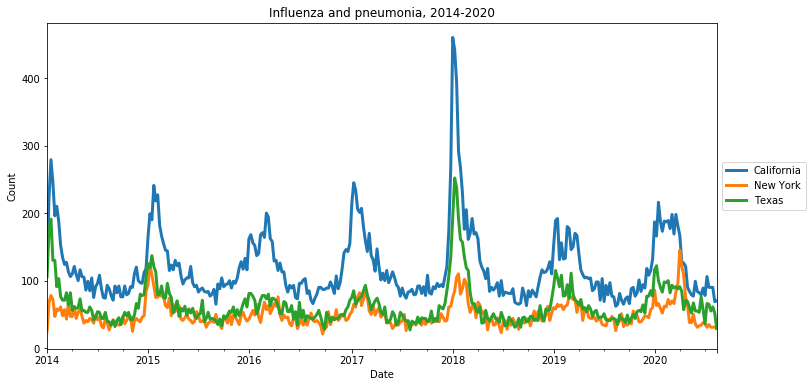

In [90]:
ax = flu_state_date_df[['California','New York','Texas']].plot(lw=3,figsize=(12,6))

ax.legend(loc='center left',bbox_to_anchor=(1,.5))

ax.set_ylabel('Count')
ax.set_title('Influenza and pneumonia, 2014-2020')

plt.savefig('CA_NY_TX.png',dpi=300)

In [98]:
# Get rid of those random week 53s
boolean_week53 = cdc_big_df['Week'] == 53

cdc_big_df = cdc_big_df[~boolean_week53]

In [103]:
# Perform the melt! Function parameters on new lines for clarity
cdc_melted_df = pd.melt(cdc_big_df,
                        id_vars = cdc_big_df.columns[:4],
                        value_vars = cdc_big_df.columns[4:],
                        var_name = 'Disease', # Rename the variable column, comment out this line to see alternative
                        value_name = 'Count'  # Rename the value variable, comment out this line to see alternative
                       )

# Inspect
cdc_melted_df.head()

,State,Year,Week,Date,Disease,Count
0,Alabama,2014,1,2014-01-04,All Cause,355.0
1,Alabama,2014,2,2014-01-11,All Cause,872.0
2,Alabama,2014,3,2014-01-18,All Cause,1044.0
3,Alabama,2014,4,2014-01-25,All Cause,1022.0
4,Alabama,2014,5,2014-02-01,All Cause,1040.0


In [104]:
cdc_melted_df['Week'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52])

In [101]:
cdc_melted_df['Disease'].unique()

array(['All Cause', 'Natural Cause', 'Septicemia', 'Malignant neoplasms',
       'Diabetes mellitus', 'Alzheimer disease',
       'Influenza and pneumonia', 'Chronic lower respiratory diseases',
       'Other diseases of respiratory system',
       'Nephritis, nephrotic syndrome and nephrosis', 'Other',
       'Diseases of heart', 'Cerebrovascular diseases', 'COVID-19'],
      dtype=object)

In [116]:
melted_single_disease_df = cdc_melted_df[cdc_melted_df['Disease'] == 'Alzheimer disease']
# melted_single_disease_df = cdc_melted_df[cdc_melted_df['Disease'] == 'Diabetes mellitus']

melted_single_disease_df.tail()

,State,Year,Week,Date,Disease,Count
107623,Wyoming,2020,29,2020-07-18,Alzheimer disease,NaN
107624,Wyoming,2020,30,2020-07-25,Alzheimer disease,NaN
107625,Wyoming,2020,31,2020-08-01,Alzheimer disease,NaN
107626,Wyoming,2020,32,2020-08-08,Alzheimer disease,NaN
107627,Wyoming,2020,33,2020-08-15,Alzheimer disease,0.0


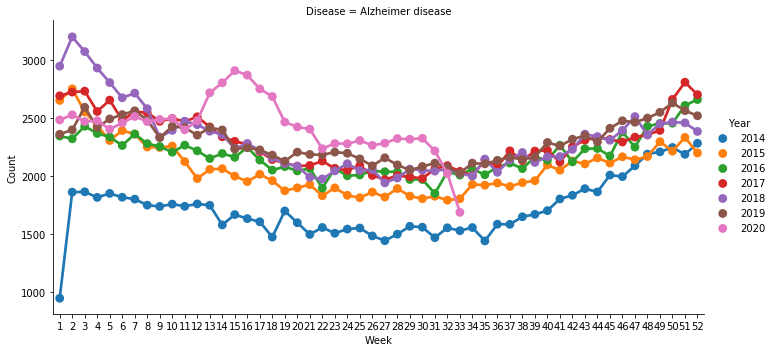

In [117]:
# There's a lot of data here and something like 14 charts to make, so this takes ~30 seconds
sb.catplot(data=melted_single_disease_df,  # Specify data to use
           x='Week',            # x-axis
           y='Count',           # y-axis
           kind='point',        # point plots
           row='Disease',       # make a new plot for each kind of disease
           hue='Year',          # make two lines for each chart for year
           estimator=np.sum,    # "aggregate" points based on sum
           ci=0,                # remove distracting confidence intervals
           aspect=2,            # make the charts nice and wide
           sharey=False)        # let the charts have their own y-axes

plt.savefig('deaths_alzheimer.png',dpi=300)

## SSA Baby Names analysis

In [ ]:
os.listdir('/namesbystate/')